In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import datetime
import pandas as pd
import pickle
import re
import matplotlib.ticker as mtick
import matplotlib as mpl
from datetime import datetime
import time
import imp
import math
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import heapq
import numpy as np
from tqdm import tqdm
from shapely.geometry import LineString, Point
from collections import defaultdict

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

import helpers
# imp.reload(helpers)

In [2]:
business = pd.read_json(data_path+"/real/yelp/dataset/business.json", lines=True)

In [3]:
business

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'ByAppointmentOnly': True, 'BusinessAcceptsCr...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Thursday': '7:30-17:00', 'Monday': '7:30-17:...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'HairSpecializesIn': {'extensions': True, 'st...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Saturday': '8:00-16:00', 'Thursday': '9:00-2...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Saturday': '10:00-21:00', 'Thursday': '10:00...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'OutdoorSeating': True, 'RestaurantsDelivery'...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Saturday': '11:00-2:00', 'Thursday': '11:00-...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH
5,Richterstr. 11,"{'OutdoorSeating': True, 'RestaurantsPriceRang...",o9eMRCWt5PkpLDE0gOPtcQ,"[Italian, Restaurants]",Stuttgart,"{'Saturday': '18:00-0:00', 'Thursday': '18:00-...",1,48.727200,9.147950,Messina,,70567,5,4.0,BW
6,"2620 Regatta Dr, Ste 102","{'BusinessAcceptsCreditCards': False, 'ByAppoi...",kCoE3jvEtg6UVz5SOD3GVw,"[Real Estate Services, Real Estate, Home Servi...",Las Vegas,"{'Thursday': '8:00-17:00', 'Monday': '8:00-17:...",1,36.207430,-115.268460,BDJ Realty,Summerlin,89128,5,4.0,NV
7,"7240 W Lake Mead Blvd, Ste 4","{'BusinessAcceptsCreditCards': True, 'Restaura...",OD2hnuuTJI9uotcKycxg1A,"[Shopping, Sporting Goods]",Las Vegas,"{'Saturday': '10:00-18:00', 'Thursday': '11:00...",1,36.197484,-115.249660,Soccer Zone,,89128,9,1.5,NV
8,2612 Brandt School Rd,"{'OutdoorSeating': True, 'RestaurantsPriceRang...",EsMcGiZaQuG1OOvL9iUFug,"[Coffee & Tea, Ice Cream & Frozen Yogurt, Food]",Wexford,{},1,40.615102,-80.091349,Any Given Sundae,,15090,15,5.0,PA
9,,{'BusinessAcceptsCreditCards': True},TGWhGNusxyMaA4kQVBNeew,"[Automotive, Auto Detailing]",Henderson,"{'Saturday': '9:00-18:00', 'Thursday': '9:00-1...",1,36.055825,-115.046350,Detailing Gone Mobile,,89014,7,5.0,NV


In [17]:
business.loc[10]['categories']

['Breakfast & Brunch',
 'Gluten-Free',
 'Coffee & Tea',
 'Food',
 'Restaurants',
 'Sandwiches']

In [11]:
business['city'].value_counts()

Las Vegas                                             26775
Phoenix                                               17213
Toronto                                               17206
Charlotte                                              8553
Scottsdale                                             8228
Pittsburgh                                             6355
Mesa                                                   5760
Montréal                                               5709
Henderson                                              4465
Tempe                                                  4263
Chandler                                               3994
Edinburgh                                              3868
Cleveland                                              3322
Madison                                                3213
Glendale                                               3206
Gilbert                                                3128
Mississauga                             

In [13]:
user = pd.read_json(data_path+"/real/yelp/dataset/user.json", lines=True)

In [4]:
checkin = pd.read_json(data_path+"/real/yelp/dataset/checkin.json", lines=True)

In [5]:
business = business.set_index("business_id")
checkin = checkin.set_index("business_id")
result = business.join(checkin)

In [6]:
result.head()

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,time
business_id,,,,,,,,,,,,,,,
FYWN1wneV18bWNgQjJ2GNg,"4855 E Warner Rd, Ste B9","{'ByAppointmentOnly': True, 'BusinessAcceptsCr...","[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Thursday': '7:30-17:00', 'Monday': '7:30-17:...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ,"{'Thursday': {'18:00': 1, '22:00': 1, '16:00':..."
He-G7vWjzVUysIKrfNbPUQ,3101 Washington Rd,"{'HairSpecializesIn': {'extensions': True, 'st...","[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Saturday': '8:00-16:00', 'Thursday': '9:00-2...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA,"{'Saturday': {'18:00': 1, '12:00': 1}, 'Thursd..."
KQPW8lFf1y5BT2MxiSZ3QA,"6025 N 27th Ave, Ste 1",{},"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ,"{'Saturday': {'22:00': 1}, 'Thursday': {'0:00'..."
8DShNS-LuFqpEWIp0HxijA,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...","[Sporting Goods, Shopping]",Tempe,"{'Saturday': '10:00-21:00', 'Thursday': '10:00...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ,"{'Saturday': {'21:00': 1, '22:00': 6, '3:00': ..."
PfOCPjBrlQAnz__NXj9h_w,581 Howe Ave,"{'OutdoorSeating': True, 'RestaurantsDelivery'...","[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Saturday': '11:00-2:00', 'Thursday': '11:00-...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH,"{'Saturday': {'21:00': 5, '22:00': 8, '3:00': ..."


In [7]:
cityname = "Las Vegas"

In [8]:
# get all facilities from the city
city_result = result[result['city'] == cityname]
print(len(result), len(city_result))

174567 26775


In [9]:
allowedCat = ['Food',"Restaurants"]
def setInSet(set1, set2):
    for s in set1:
        if s in set2:
            return True
    return False

city_result = city_result[city_result['categories'].apply(lambda cat: setInSet(cat,allowedCat))]
print(len(city_result))

7600


In [54]:
lat0 = 30.7009
lon0 = -145.675

met_lat = []
met_lon = []
for row in city_result.iterrows():
    p = helpers.transform_point((row[1].longitude, row[1].latitude), lat0, lon0)
    met_lat.append(p[1])
    met_lon.append(p[0])
city_result['metric lon'] = pd.Series(met_lat,index=city_result.index)
city_result['metric lat'] = pd.Series(met_lon,index=city_result.index) 

In [55]:
city_result.head()

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,time,metric lat,metric lon
business_id,,,,,,,,,,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,6730 S Las Vegas Blvd,"{'OutdoorSeating': False, 'RestaurantsDelivery...","[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",Las Vegas,"{'Saturday': '8:30-22:30', 'Thursday': '8:30-2...",1,36.066914,-115.170848,Flight Deck Bar & Grill,Southeast,89119,13,4.0,NV,"{'Saturday': {'22:00': 2, '23:00': 1, '3:00': ...",2.919789e+06,596342.978080
4srfPk1s8nlm1YusyDUbjg,"6889 S Eastern Ave, Ste 101","{'OutdoorSeating': False, 'RestaurantsPriceRan...","[Fast Food, Restaurants, Sandwiches]",Las Vegas,{},1,36.064652,-115.118954,Subway,Southeast,89119,6,2.5,NV,"{'Saturday': {'21:00': 1, '1:00': 1}, 'Thursda...",2.924756e+06,596091.672273
n7V4cD-KqqE3OXk0irJTyA,"6587 Las Vegas Blvd S, Ste 171","{'OutdoorSeating': False, 'RestaurantsPriceRan...","[Arcades, Arts & Entertainment, Gastropubs, Re...",Las Vegas,"{'Saturday': '11:00-1:00', 'Thursday': '11:00-...",1,36.068259,-115.178877,GameWorks,Southeast,89119,349,3.0,NV,"{'Saturday': {'21:00': 21, '20:00': 13, '15:00...",2.919021e+06,596492.443011
MmR06_kNAbmOPK-0pKvGtA,4300 Meadows Ln,{},"[Food, Coffee & Tea, Desserts]",Las Vegas,{},1,36.172532,-115.197258,Cinnabon,Westside,89107,3,4.0,NV,"{'Saturday': {'22:00': 1, '23:00': 1}, 'Sunday...",2.917261e+06,608080.691820
F0fEKpTk7gAmuSFI0KW1eQ,"4250 S Rainbow Blvd, Ste 1007","{'RestaurantsPriceRange2': 3, 'GoodForMeal': {...","[Italian, Restaurants]",Las Vegas,{},0,36.111057,-115.241688,Cafe Mastrioni,Spring Valley,89103,3,1.5,NV,"{'Sunday': {'4:00': 1}, 'Monday': {'5:00': 1, ...",2.913009e+06,601248.803493


In [ ]:

# map to metric

# load clean graph

# assign to graph nodes

# run 2-step dijkstra and get the probabilities of customers

# generate customers

# export graph with customers

In [155]:
fname = data_path + "/real/LasVegas/lvegas_clean_doubled.ntw"

G = nx.Graph()
node_lat = {}
node_lon = {}
graph_id = 0
with open(fname,'r') as f:
    t = f.readline().split()
    graph_id = int(t[0])
    nodes = int(t[1])
    print("Nodes: %d" % nodes)
    edges = int(t[2])
    print("Edges: %d" % edges)
    for i in range(edges):
        info = f.readline().split()
        id1 = int(info[0])
        id2 = int(info[1])
        assert(id1 < nodes)
        assert(id2 < nodes)
        G.add_edge(id1, id2, weight=int(info[2]))

    for i in range(nodes):
        info = f.readline().split()
        try:
            node_lat[i] = float(info[0])
            node_lon[i] = float(info[1])
            if i not in G:
                G.add_node(i)
        except ValueError:
            print("Error in graph node info: ")
            print(info)
            print("Probably you need to remove new line charachter from graph file")
    nx.set_node_attributes(G, 'lat', node_lat)
    nx.set_node_attributes(G, 'lon', node_lon)

Nodes: 425759
Edges: 508522


In [33]:
city_result.iloc[0].name

'Pd52CjgyEU3Rb8co6QfTPw'

In [91]:
# map shops
graph_points = []
inverse_index = {}
point_index = []
for node in G.nodes_iter():
    try:
        inverse_index[node] = len(graph_points)
        point_index.append(node)
        graph_points.append((float(G.node[node]['lat']), float(G.node[node]['lon'])))
    except ValueError:
        print(G.node[node])
    
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(graph_points)
distances, indices = nbrs.kneighbors(city_result[['metric lat','metric lon']])

shop_point_business_id = defaultdict(lambda: []) # mapping node_id -> shop_id
for i in range(len(city_result)): 
    node_local_index_in_graph = indices[i][0]
    closest_node_id = point_index[node_local_index_in_graph]
    shop_id = city_result.iloc[i].name
    shop_point_business_id[closest_node_id].append(shop_id)
print(len(shop_point_business_id), ", overlapping shops on nodes possible, original number ", len(city_result))

4089 , overlapping shops on nodes possible, original number  7600


In [18]:
all_edges = []
class Edge:
    def __init__(self, edge,w,sp_obj,minlat,minlon,maxlat,maxlon):
        self.edge = edge
        self.w = int(w)
        self.sp_obj = sp_obj
        self.minlat = minlat
        self.minlon = minlon
        self.maxlat = maxlat
        self.maxlon = maxlon

for edge in G.edges_iter():
    w = G[edge[0]][edge[1]]['weight']
    lat1 = G.node[edge[0]]['lat']
    lon1 = G.node[edge[0]]['lon']
    lat2 = G.node[edge[1]]['lat']
    lon2 = G.node[edge[1]]['lon']
    sp_obj = LineString([(lat1,lon1),
                         (lat2,lon2)])
    minlat = min(lat1,lat2)
    maxlat = max(lat1,lat2)
    minlon = min(lon1,lon2)
    maxlon = max(lon1,lon2)
    all_edges.append(Edge(edge,w,sp_obj,minlat,minlon,maxlat,maxlon))

In [29]:
global_max_w = 0
for e in all_edges:
    if e.w > global_max_w:
        global_max_w = e.w
global_max_w

8843

In [75]:
global_max_w = 2000

In [78]:
def is_edge_feasible(lat, lon, edge):
    if edge.minlat-global_max_w > lat or edge.minlon-global_max_w > lon \
        or edge.maxlat+global_max_w < lat or edge.maxlon+global_max_w < lon:
        return False
    return True

def getPoint(lat, lon):
    return Point(lat, lon)

def get_point_to_edge_distance(p, edge_line, edge_length):
    delta_length = edge_line.project(p)
    return delta_length, edge_length - delta_length

def get_new_edges_length(lat, lon, graph):
    closest_edge = ()
    closest_edge_split = None
    closest_edge_dist = 10000000
    for edge in all_edges:
        if is_edge_feasible(lat, lon, edge):
            point = getPoint(lat,lon)
            dist = edge.sp_obj.distance(point)
            if dist < closest_edge_dist:
                len1, len2 = get_point_to_edge_distance(point, edge.sp_obj, edge.w)
                closest_edge_dist = dist
                closest_edge = edge.edge
                closest_edge_split = (len1, len2)
    return closest_edge, closest_edge_split

def insert_in_graph(lat, lon, graph):
    closest_edge, closest_edge_split = get_new_edges_length(lat, lon, graph)
    if closest_edge != () and closest_edge_split[0] != 0 and closest_edge_split[1] != 0:
        graph.remove_edge(closest_edge[0],closest_edge[1])
        new_ind = len(graph)
        assert(new_ind not in graph)
        graph.add_edge(closest_edge[0],new_ind,weight=closest_edge_split[0])
        graph.add_edge(new_ind,closest_edge[1],weight=closest_edge_split[1])
    
shop_point_business_id = {} # mapping node_id -> shop_id
for i in tqdm(range(len(city_result))): 
    insert_in_graph(city_result.iloc[i]['metric lat'], city_result.iloc[i]['metric lon'], G)


  0%|          | 8/7600 [00:02<43:20,  2.92it/s]
Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/lib/python3.4/threading.py", line 920, in _bootstrap_inner
    self.run()
  File "/home/alogins/.local/lib/python3.4/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.4/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  1%|          | 55/7600 [00:17<45:10,  2.78it/s]


NetworkXError: The edge 64848-68301 is not in the graph

In [65]:
subset_fac = np.random.choice(city_result.index,1000)

In [66]:
subset_fac = city_result.loc[pd.Series(subset_fac)]

In [85]:
subset_dots = np.random.choice([node for node in G.nodes()],1000)

In [86]:
subset_dots_x = [G.node[node]['lat'] for node in subset_dots]
subset_dots_y = [G.node[node]['lon'] for node in subset_dots]

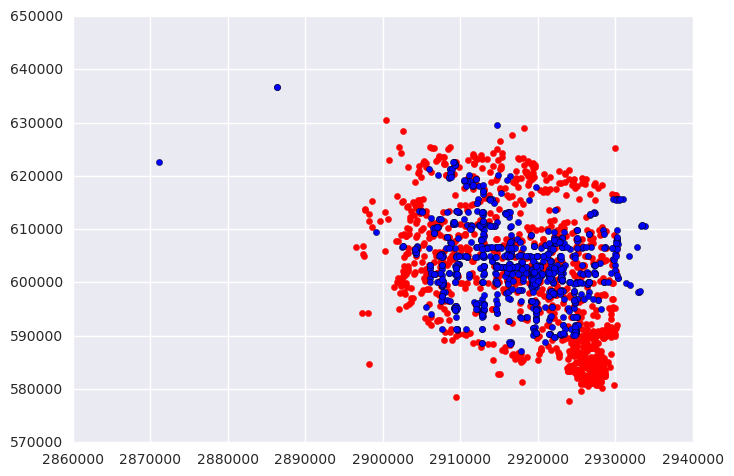

In [87]:
plt.scatter(subset_dots_x, subset_dots_y,color="red")
plt.scatter(subset_fac['metric lat'], subset_fac['metric lon'])

In [20]:
len(G), nx.number_of_edges(G)

(168741, 201742)

In [161]:
shop_point_business_id_subset = {}
subsetsize = 2
for k in shop_point_business_id:
    shop_point_business_id_subset[k] = shop_point_business_id[k]
    subsetsize -= 1
    if subsetsize == 0:
        break

len(shop_point_business_id)

4089

In [164]:
node_queue = []
distances = {}

for shop_node_id in shop_point_business_id:
    distances[shop_node_id] = [[shop_node_id, 0]]
    heappush(node_queue, (0, shop_node_id)) 
    
def remove_el_from_heap(h, el):
    i = -1
    for j in range(len(h)):
        if node_queue[j][1] == el:
            i = j
            break
    if i == -1:
        return
    if len(h) == 0:
        return
    h[i] = h[-1]
    h.pop()
    if i < len(h):
        heapq._siftup(h, i)
        heapq._siftdown(h, 0, i)
    
it = 0
start = time.time()
while len(node_queue) > 0:
    it += 1
    if it % 100000 == 0:
        print("it %d" % it)
    next_node_entry = heappop(node_queue)
    node_dist = next_node_entry[0]
    next_node = next_node_entry[1]
    for next_shop_index in range(len(distances[next_node])):
        next_shop = distances[next_node][next_shop_index][0]
        next_shop_dist = distances[next_node][next_shop_index][1]
        for n in G[next_node]:
            edge_length = G[next_node][n]['weight']
            new_dist = next_shop_dist + int(edge_length)
            new_heap_entry = (new_dist, n)

            if n not in distances:
                distances[n] = [[next_shop, new_dist]]
                heappush(node_queue, new_heap_entry)
                continue
                
            assert(len(distances[n]) < 3)

            if next_shop in [shop_dist[0] for shop_dist in distances[n]]:
                index = 0
                if distances[n][0][0] != next_shop:
                    if len(distances[n]) > 1 and distances[n][1][0] == next_shop:
                        index = 1
                    else:
                        print(distances[n],next_shop)
                        index = -1
                assert(index != -1)
                
                distance_per_shop = distances[n][index][1]

                if distance_per_shop > new_dist:
                    distances[n][index][1] = new_dist

                    new_heap_entry = (new_dist, n)
                    remove_el_from_heap(node_queue, n)
                    heappush(node_queue, new_heap_entry)
                continue

            if len(distances[n]) == 1:
                distances[n].append([next_shop, new_dist])
                heappush(node_queue, new_heap_entry)
                continue

            if len(distances[n]) == 2:
                continue
finish = time.time()
print("Took %d sec"% (finish-start))

it 10000
it 20000
it 30000
it 40000
it 50000
it 60000
it 70000
it 80000
it 90000
it 100000
it 110000
it 120000
it 130000
it 140000
it 150000
it 160000
it 170000
it 180000
it 190000
it 200000
it 210000
it 220000
it 230000
it 240000
it 250000
it 260000
it 270000
it 280000
it 290000
it 300000
it 310000
it 320000
it 330000
it 340000
it 350000
it 360000
it 370000
it 380000
it 390000
it 400000
it 410000
it 420000
it 430000
it 440000
it 450000
it 460000
it 470000
it 480000
it 490000
it 500000
it 510000
it 520000
it 530000
it 540000
it 550000
it 560000
it 570000
it 580000
it 590000
it 600000
it 610000
it 620000
it 630000
it 640000
it 650000
it 660000
it 670000
it 680000
it 690000
it 700000
it 710000
it 720000
it 730000
it 740000
it 750000
it 760000
it 770000
it 780000
it 790000
it 800000
it 810000
it 820000
it 830000
it 840000
it 850000
Took 135 sec


In [ ]:
# shop_dist_by_node = defaultdict(lambda: {})

# for shop_node_id in tqdm(shop_point_business_id):
#     lengths=nx.single_source_dijkstra_path_length(G,shop_node_id)
#     for node in lengths:
#         shop_dist_by_node[node][shop_node_id] = lengths[node]

In [165]:
assert(len(distances) == len(G))
for node in distances:
    assert(len(distances[node]) == 2)

In [166]:
accos_vals = []
for node in distances:
    for dist_ent in distances[node]:
        accos_vals += [dist_ent[1]]

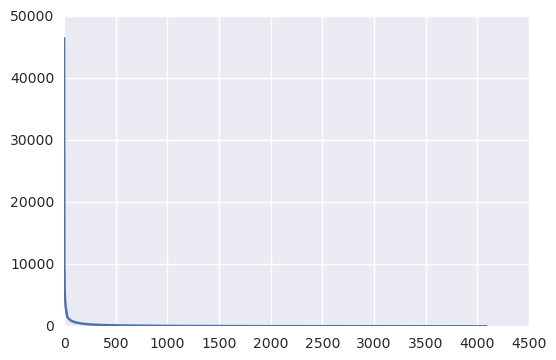

In [167]:
a = np.array(pd.Series(assoc_vals).value_counts())
plt.plot(a)

In [173]:
def getCheckins(business_id, df):
    checkin_json = df.loc[business_id]['time']
    total_checkins = 0
    try:
        day_checkins = checkin_json['Saturday']
        for t in day_checkins:
            total_checkins += day_checkins[t]
    except KeyError:
        pass # no that day
    except TypeError:
        pass # nan - no checkins at all
    return total_checkins
    
# getCheckins("Pd52CjgyEU3Rb8co6QfTPw", city_result)

In [174]:
node_by_region = defaultdict(lambda: defaultdict(lambda: []))
region_by_node = {}

for node in distances:
    association = [dist_entry[0] for dist_entry in distances[node]]
    node_by_region[association[0]][association[1]].append(node)
    region_by_node[node] = (association[0],association[1])
    
number_of_nodes_in_region = {}
for k1 in node_by_region:
    number_of_nodes_in_region[k1] = 0
    for k2 in node_by_region[k1]:
        number_of_nodes_in_region[k1] += len(node_by_region[k1][k2])
        
number_of_checkins_per_node = {} #key error is a bug, because only shop_node_ids should be queried
for node in shop_point_business_id:
    number_of_checkins_per_node[node] = getCheckins(shop_point_business_id[node][0],city_result)
        
number_of_checkins_by_region = {}
for k1 in node_by_region:
    number_of_checkins_by_region[k1] = 0
    for k2 in node_by_region[k1]:
        number_of_checkins_by_region[k1] += number_of_checkins_per_node[k2]

In [179]:
def getNodeProbability(node):
    center_shop, neighbor_shop = region_by_node[node]
    checkins_of_neighbor = number_of_checkins_per_node[neighbor_shop]
    checking_of_all_neighbors = number_of_checkins_by_region[center_shop]
    number_of_nodes_in_subregion = len(node_by_region[center_shop][neighbor_shop])
    number_of_nodes_in_this_region = number_of_nodes_in_region[center_shop]
    checkins_of_center_shop = number_of_checkins_per_node[center_shop]
    
    t1 = 0.
    if (checkins_of_neighbor != 0):
        t1 = float(checkins_of_neighbor)/float(checking_of_all_neighbors)
        assert(t1 <= 1)
        
    t2 = 0.
    if (number_of_nodes_in_subregion != 0):
        t2 = float(number_of_nodes_in_subregion)/float(number_of_nodes_in_this_region)
        assert(t2 <= 1)
        
    omega = 0.5
    return float(checkins_of_center_shop)*(omega*t1 + (1.-omega)*t2)

In [177]:
for i in range(len(G)):
    assert(i in G)

In [180]:
probabilities = []
for i in range(len(G)):
    probabilities.append(getNodeProbability(i))

In [181]:
probabilities = np.array(probabilities)
probabilities_normalized = probabilities/np.sum(probabilities)

(0, 100000)

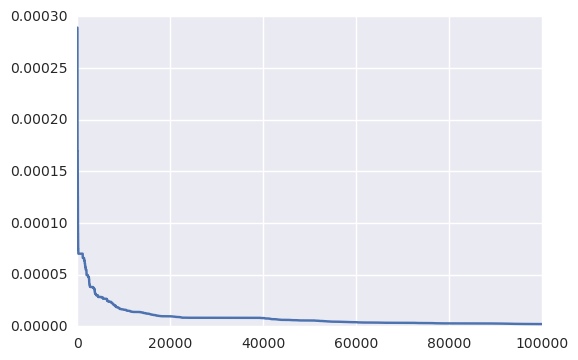

In [197]:
plt.plot(np.flip(np.sort(probabilities_normalized),axis=0))
plt.xlim(0,100000)

In [240]:
number_of_customers = 100000
customer_node_ids = np.random.choice(len(probabilities_normalized), 
                                         number_of_customers, 
                                         p=probabilities_normalized, 
                                         replace=False)

In [202]:
helpers.export_graph(G, "./lasvegas_1000cust.ntw", 111, customer_node_ids)

### export hours

In [232]:
def get_capacity_by_shop_id(shop_id):
    try:
        hours_str = city_result.loc[shop_id]['hours']['Saturday']
        m = re.search("(\d+):(\d+)-(\d+):(\d+)",hours_str)
        if m:
            hours = int(float(m.group(3)) + float(m.group(4))/60. - float(m.group(1)) - float(m.group(2))/60.)
            if hours == 0:
                hours = 24
            if hours < 0:
                hours = 24 + hours
            if hours > 24:
                print(hours_str)
        else:
            hours = 6.1
    except KeyError:
        hours = 6.1
        
    return hours

In [233]:
# for each facility in shop_list arrays
# get node_id, parse hours
capacities = {}
for node_id in shop_point_business_id:
    capacities[node_id] = get_capacity_by_shop_id(shop_point_business_id[node_id][0]) # get only the top point

In [234]:
capacities_df = pd.Series(capacities)
capacities_df.value_counts()

6.1     1100
24.0     488
11.0     372
12.0     338
10.0     241
14.0     211
13.0     200
15.0     185
16.0     133
8.0      126
9.0      124
5.0      107
18.0     101
6.0       83
17.0      77
7.0       77
4.0       41
19.0      35
20.0      19
3.0       13
2.0        7
21.0       5
23.0       3
22.0       2
1.0        1
dtype: int64

In [237]:
# export facility capacities based on hours
capacity_scale = 3
df = pd.Series(capacity_scale*pd.Series(capacities_df),dtype=int)
df.to_csv(data_path + "/real/LasVegas/facility_location_hours.csv",sep=" ")
df.mean(), len(df), df.mean() * len(df)

(34.9457079970653, 4089, 142893.0)

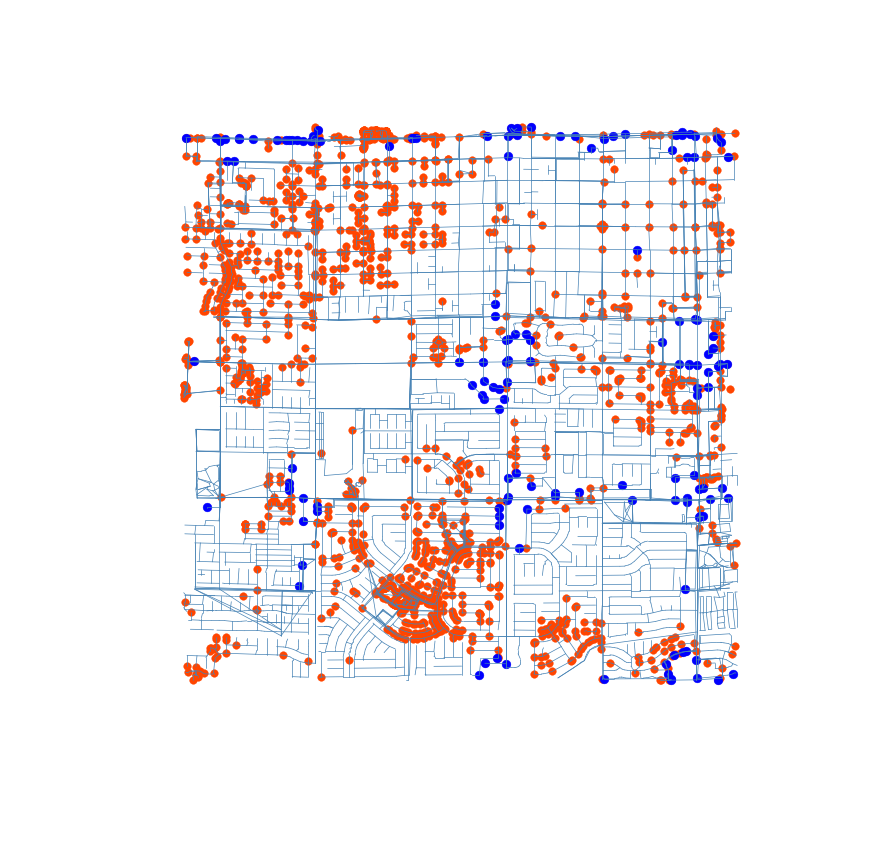

In [241]:
plt.figure(dpi=300,figsize=(10,10))
plt.axis('off')

def check_node(node):
    if G.node[node]['lat'] < 2910000 or G.node[node]['lat'] > 2915000:
        return False
    if G.node[node]['lon'] < 600000 or G.node[node]['lon'] > 605000:
        return False
    return True
        
for edge in nx.edges_iter(G):
    if check_node(edge[0]) and check_node(edge[1]):
        plt.plot([G.node[edge[0]]['lat'],G.node[edge[1]]['lat']],
                 [G.node[edge[0]]['lon'],G.node[edge[1]]['lon']],color="steelblue",linewidth=0.5)
#     t = G[edge[0]][edge[1]]['etype'] 
#     plt.plot([G.node[edge[0]]['lat'],G.node[edge[1]]['lat']],
#              [G.node[edge[0]]['lon'],G.node[edge[1]]['lon']],color=color_map[t],linewidth=0.5)
#     plt.plot([G.node[edge[0]]['lat'],G.node[edge[1]]['lat']],
#              [G.node[edge[0]]['lon'],G.node[edge[1]]['lon']],color="steelblue",linewidth=0.5)

# tmp = []
# for node in nx.nodes_iter(G):
#     if len(G.node[node]) > 0:
#         tmp.append([G.node[node]['lat'],G.node[node]['lon']])
# tmp = np.array(tmp).T
# plt.scatter(tmp[0],tmp[1],marker='.',s=3)

tmp = []
for node in customer_node_ids:
    if check_node(node):
        tmp.append([G.node[node]['lat'],G.node[node]['lon']])
tmp = np.array(tmp).T
plt.scatter(tmp[0],tmp[1],marker='o',color="orangered",s=30)
    
tmp = []
for node in shop_point_business_id:
    if check_node(node):
        tmp.append([G.node[node]['lat'],G.node[node]['lon']])
tmp = np.array(tmp).T
plt.scatter(tmp[0],tmp[1],marker='o',color="blue",s=40)